In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import matplotlib.image as mpimg
from subprocess import Popen
import glob,os,time,sys,math,shutil
import numpy as np
import re
import pandas as pd
from IPython.display import display,clear_output
from matplotlib.ticker import FormatStrFormatter
from pylab import rcParams
import seaborn as sns
import matplotlib as mpl
from scipy.stats import gaussian_kde,kde,ks_2samp,entropy
timestr=time.strftime("%m%d")
from matplotlib import colormaps
import warnings
warnings.filterwarnings('ignore')
markerarray1=mpl.colormaps['plasma'](np.linspace(0,0.8,4))

In [3]:
print(np.linspace(0,0.8,5))

[0.  0.2 0.4 0.6 0.8]


In [4]:
without_drug_files=glob.glob('/home/smriti/BigStorage/old_computer_work/Desktop/KMC_HBV/MC_HEVA/allEnergyFiles/DMU--4.5_RGB--6.0_MU--10.8/*energy.dat')


In [5]:
all_files_data=[]
max_length=[]
for i, file in enumerate(without_drug_files):
     # Start with fewer files
    try:
        print(f"Processing file {i+1}: {os.path.basename(file)}")
        df = pd.read_csv(file)
        if(df['NE'].iloc[-1]==120):
            print(df['sweep'].iloc[-1],df['NE'].iloc[-1])
            max_length.append(df['sweep'].iloc[-1])
            all_files_data.append(df[['sweep','NE']])

            
        else:
            continue
        del df
    
    except Exception as e:
        print(f"Error processing file {file}: {e}")
        continue




Processing file 1: DMU--4.5_RGB--6.0_MU--10.8-seed-61-energy.dat
1273355 120
Processing file 2: DMU--4.5_RGB--6.0_MU--10.8-seed-194-energy.dat
Processing file 3: DMU--4.5_RGB--6.0_MU--10.8-seed-51-energy.dat
Processing file 4: DMU--4.5_RGB--6.0_MU--10.8-seed-158-energy.dat
Processing file 5: DMU--4.5_RGB--6.0_MU--10.8-seed-13-energy.dat
9289019 120
Processing file 6: DMU--4.5_RGB--6.0_MU--10.8-seed-195-energy.dat
Processing file 7: DMU--4.5_RGB--6.0_MU--10.8-seed-155-energy.dat
Processing file 8: DMU--4.5_RGB--6.0_MU--10.8-seed-69-energy.dat
Processing file 9: DMU--4.5_RGB--6.0_MU--10.8-seed-83-energy.dat
Processing file 10: DMU--4.5_RGB--6.0_MU--10.8-seed-57-energy.dat
Processing file 11: DMU--4.5_RGB--6.0_MU--10.8-seed-133-energy.dat
Processing file 12: DMU--4.5_RGB--6.0_MU--10.8-seed-91-energy.dat
3077576 120
Processing file 13: DMU--4.5_RGB--6.0_MU--10.8-seed-14-energy.dat
Processing file 14: DMU--4.5_RGB--6.0_MU--10.8-seed-191-energy.dat
Processing file 15: DMU--4.5_RGB--6.0_MU--1

In [7]:
all_files_data_new=[]
max_sweep=np.max(max_length)
print(max_sweep)
for df in all_files_data:
    if(df['sweep'].iloc[-1]<max_sweep):
        df_extended=pd.DataFrame(columns=['sweep','NE'])
        df_extended['sweep']=np.arange(round(int(df['sweep'].iloc[-1]),-2)+100,round(int(max_sweep),-2),100)
        df_extended['NE']=120
        df_new=pd.concat((df,df_extended),ignore_index=True)
        all_files_data_new.append(df_new)
        del df_extended,df_new
    else:
        all_files_data_new.append(df)
    del df
del all_files_data


18390442


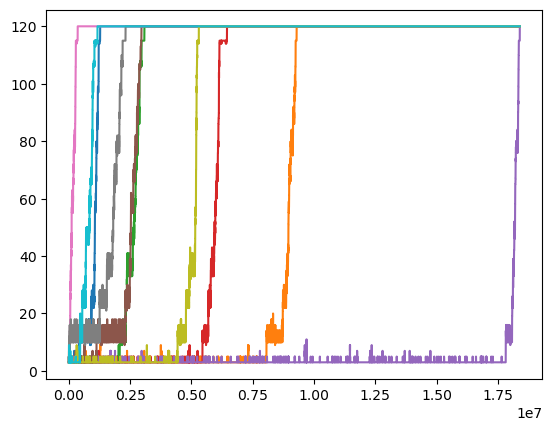

In [5]:
for df in all_files_data_new[0:10]:
    plt.plot(df['sweep'], df['NE'], label='NE vs Sweep')

In [8]:
# Simple approach - just concatenate all data

combined_data=pd.DataFrame()
if all_files_data_new:
    # Concatenate all data
    combined_data = pd.concat(all_files_data_new, ignore_index=True)
    #combined_data['seconds']=combined_data['seconds']*10**(-5) 
    # Group by sweep and calculate mean
    final_result = combined_data.groupby('NE')['sweep'].agg(['mean', 'count']).reset_index()
    final_result2=combined_data.groupby('sweep')['NE'].agg(['mean','count']).reset_index()
    final_result.columns = ['NE', 'average_sweep', 'count']
    final_result2.columns=['Sweep','average_NE','count']
    #print("Final aggregated data:")
    #print(final_result.head(10))
    print(f"Total unique sweeps: {len(final_result2)}")
else:
    print("No data was successfully processed")

Total unique sweeps: 183979


In [9]:
print(final_result2)
final_resultn=final_result2[final_result2['count']>70]
print(final_resultn)

           Sweep  average_NE  count
0              0    3.000000     76
1            100    3.184211     76
2            200    3.236842     76
3            300    3.236842     76
4            400    3.236842     76
...          ...         ...    ...
183974  18390100  120.000000     76
183975  18390200  120.000000     76
183976  18390300  120.000000     76
183977  18390400  120.000000      1
183978  18390442  120.000000      1

[183979 rows x 3 columns]
           Sweep  average_NE  count
0              0    3.000000     76
1            100    3.184211     76
2            200    3.236842     76
3            300    3.236842     76
4            400    3.236842     76
...          ...         ...    ...
183972  18389900  120.000000     76
183973  18390000  120.000000     76
183974  18390100  120.000000     76
183975  18390200  120.000000     76
183976  18390300  120.000000     76

[183904 rows x 3 columns]


In [7]:
final_resultn.to_csv('./average_traj_stdsalt_wodrug.csv',index=False)

In [75]:
xlabel_ticks=np.arange(0, max_sweep+100)*10**(-5)

150


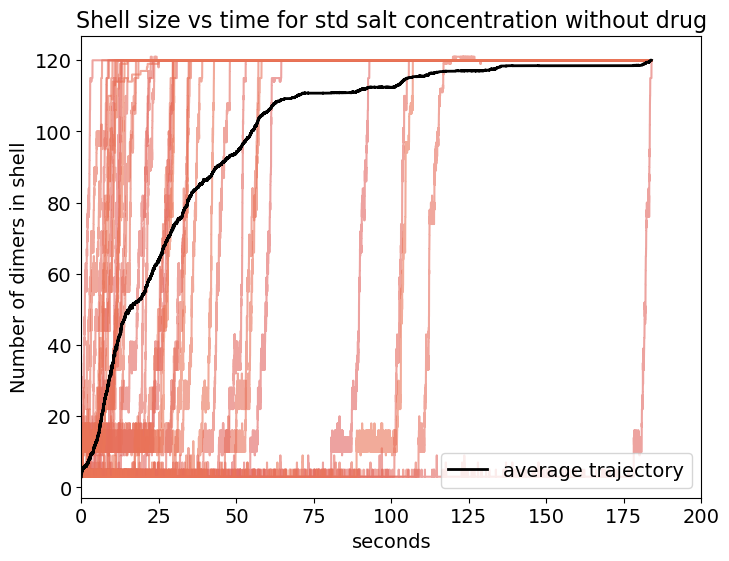

In [10]:
markerarraystd=mpl.colormaps['plasma'](np.linspace(0.6,0.8,150))
count=0
plt.figure(figsize=(8,6))
print(len(without_drug_files))
for df in all_files_data_new[0:40]:
        #print(df['s'].iloc[-1])
        count+=1
        plt.plot(df['sweep'],df['NE'],color=markerarraystd[count],alpha=0.6)
plt.plot(final_resultn['Sweep'],final_resultn['average_NE'],color='black',linewidth=2,label='average trajectory')
#plt.xscale('log')
plt.xlim(0, 2*10**7)
orginal_ticks = plt.xticks()[0]
new_labels = [f"{int(tick*10**(-5))}" for tick in orginal_ticks]
plt.xticks(orginal_ticks, new_labels)
plt.xlabel('seconds',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Number of dimers in shell',fontsize=14)

plt.title('Shell size vs time for std salt concentration without drug',fontsize=16)
plt.legend(fontsize=14,loc='lower right')
plt.savefig('NE_vs_sweep_stdsalt_wodrug.png', dpi=300, bbox_inches='tight')

In [63]:
# Percentile-based binning (equal frequency bins)
if all_files_data:
    combined_data = pd.concat(all_files_data, ignore_index=True)
    
    # Create quantile-based bins (e.g., 20 bins with equal number of data points)
    n_bins = 20
    combined_data['sweep_quantile'] = pd.qcut(
        combined_data['sweep'], 
        q=n_bins, 
        labels=False
    )
    
    # Get the actual sweep ranges for each quantile
    quantile_ranges = combined_data.groupby('sweep_quantile')['sweep'].agg(['min', 'max']).reset_index()
    quantile_ranges['sweep_range'] = quantile_ranges.apply(
        lambda row: f"{row['min']}-{row['max']}", axis=1
    )
    
    # Calculate statistics for each quantile
    quantile_stats = combined_data.groupby('sweep_quantile')['NE'].agg([
        'mean', 'std', 'count'
    ]).reset_index()
    
    # Merge the results
    quantile_result = pd.merge(quantile_ranges, quantile_stats, on='sweep_quantile')
    
    print("Quantile-based binning:")
    print(quantile_result[['sweep_range', 'mean', 'std', 'count']].head(10))

Quantile-based binning:
       sweep_range       mean        std  count
0         0-198000   5.893983   7.334998  97069
1    198100-396900   8.814403  15.782194  97060
2    397000-599200  10.691156  18.149975  97104
3    599300-805000  15.532179  25.376818  97065
4   805100-1023000  17.409310  28.544493  97056
5  1023100-1258200  19.850191  32.285162  97037
6  1258300-1523100  19.046852  33.148905  97072
7  1523200-1815000  15.287556  30.513054  97063
8  1815100-2127400  13.049959  25.774687  97079
9  2127500-2450800  18.243690  33.185885  97062


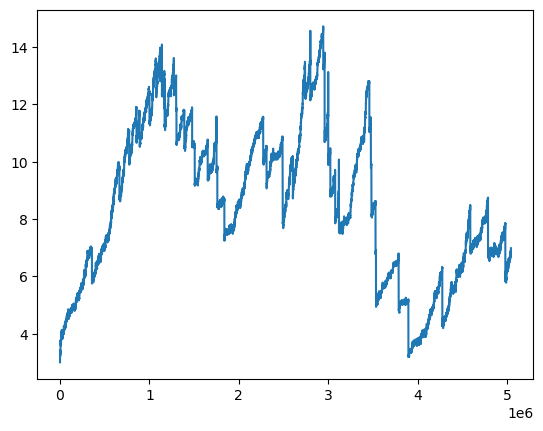

In [26]:
plt.plot(final_aggregated['sweep'],final_aggregated['average_NE'])

In [ ]:
files=glob.glob('0211-HPC/allenergy/*6.5*en*')
print(files)

plt.figure(figsize=[16,10])
#plt.xlim([0,80000])
plt.yticks([3,10,35,55,90,120],fontsize=20)
plt.ylabel('Numer of dimers',fontsize=20)
plt.xlabel('MC steps',fontsize=20)
plt.xticks(fontsize=20)
plt.grid(True)
t4=0
for fen in files:
    with open (fen,'r') as f:
        a=f.readlines()
        #a=list(f)
        lastframe=a[-1].split()[-2:]
        if lastframe==['42','120'] :
            t4+=1
            time=[]
            size=[]
            for each in a[1:]:
                time.append(int(each.split()[0]))
                size.append(int(each.split()[-1]))
            plt.plot(time,size)
            #plt.title('T4')
            #sys.exit()
#plt.title('T4, %d trajectories'%t4,fontsize=20);

#plt.figure(figsize=[20,5])
#plt.xlim([0,80000])
plt.yticks([3,10,35,55,90,120],fontsize=20)
plt.ylabel('Numer of dimers',fontsize=20)
plt.xlabel('MC steps',fontsize=20)
plt.xticks(fontsize=20)
plt.grid(True)
t3=0
for fen in files:
    with open (fen,'r') as f:
        a=f.readlines()
        #a=list(f)
        lastframe=a[-1].split()[-2:]
        if lastframe==['32','90']:
            t3+=1
            time=[]
            size=[]
            for each in a[1:]:
                time.append(int(each.split()[0]))
                size.append(int(each.split()[-1]))
            plt.plot(time,size,'k')
            plt.xlim([0,100000])
plt.tight_layout()            
#plt.title('T3, %d trajectories'%t3,fontsize=20);
#plt.savefig('../../TrajectoriesT3T4-02.png',dpi=300)
            #sys.exit()            